In [9]:
import pandas as pd
import numpy as np
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.io import wavfile
from tempfile import mktemp
import glob
import plotly.express as px
from shutil import copyfile

In [10]:
df = pd.read_csv('/Volumes/BIRDSONG/train.csv')

In [11]:
df

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,...,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,...,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,...,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,...,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21370,4.5,no,yetvir,1 (mono),2019-05-15,both,28,XC477608.mp3,level,Yellow-throated Vireo,...,477608,https://www.xeno-canto.org/477608,United States,Sue Riffe,Vireo flavifrons_Yellow-throated Vireo,-84.0131,0-3(s),13:00,Sue Riffe,Creative Commons Attribution-NonCommercial-Sha...
21371,3.5,no,yetvir,1 (mono),2017-05-14,Not specified,52,XC500348.mp3,Not specified,Yellow-throated Vireo,...,500348,https://www.xeno-canto.org/500348,United States,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,15:00,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...
21372,5.0,no,yetvir,1 (mono),2017-06-10,Not specified,96,XC501230.mp3,Not specified,Yellow-throated Vireo,...,501230,https://www.xeno-canto.org/501230,United States,Jacob Saucier,Vireo flavifrons_Yellow-throated Vireo,-77.3422,Not specified,13:30,Jacob Saucier,Creative Commons Attribution-NonCommercial-Sha...
21373,3.5,no,yetvir,2 (stereo),2009-05-06,level,35,XC54828.mp3,level,Yellow-throated Vireo,...,54828,https://www.xeno-canto.org/54828,United States,Mike Nelson,Vireo flavifrons_Yellow-throated Vireo,-83.9462,>10(s),9:45am,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [22]:
import os
os.system("afplay /Volumes/BIRDSONG/train_audio/aldfly/XC2628.mp3") 


0

/Users/advikabattini/anaconda/envs/birdsong/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


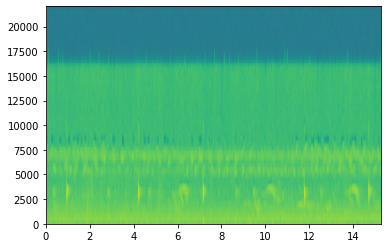

In [29]:
mp3_audio = AudioSegment.from_file('/Volumes/BIRDSONG/train_audio/aldfly/XC2628.mp3', format="mp3")  # read mp3
wname = mktemp('.wav')  # use temporary file
mp3_audio.export(wname, format="wav")  # convert to wav
FS, data = wavfile.read(wname)  # read wav file
plt.specgram(data, Fs=FS, NFFT=128, noverlap=0)  # plot
plt.show()

### Image download for each bird

In [7]:
from google_images_download import google_images_download   #importing the library

response = google_images_download.googleimagesdownload()   #class instantiation



In [30]:
for i in list(df.species.unique()):
    arguments = {"keywords":f"{i}","limit":1,"print_urls":True}   #creating list of arguments
    paths = response.download(arguments)   #passing the arguments to the function
    print(paths) 


Item no.: 1 --> Item name = Alder Flycatcher
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/160817201-480px.jpg
Completed Image ====> 1.160817201-480px.jpg

Errors: 0

({'Alder Flycatcher': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Alder Flycatcher/1.160817201-480px.jpg']}, 0)

Item no.: 1 --> Item name = American Avocet
Evaluating...
Starting Download...
Image URL: https://nas-national-prod.s3.amazonaws.com/web_h_a1_4523_1_american-avocet_kirk_benson_kk-breeding-adult-male.jpg
Completed Image ====> 1.web_h_a1_4523_1_american-avocet_kirk_benson_kk-breeding-adult-male.jpg

Errors: 0

({'American Avocet': ['/Users/advikabattini/Desktop/birdsong_app/downloads/American Avocet/1.web_h_a1_4523_1_american-avocet_kirk_benson_kk-breeding-adult-male.jpg']}, 0)

Item no.: 1 --> Item name = American Bittern
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/og/75242201-1200px.jpg
Completed Image ====

Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/68034911-480px.jpg
Completed Image ====> 1.68034911-480px.jpg

Errors: 0

({"Bewick's Wren": ["/Users/advikabattini/Desktop/birdsong_app/downloads/Bewick's Wren/1.68034911-480px.jpg"]}, 0)

Item no.: 1 --> Item name = Black-billed Cuckoo
Evaluating...
Starting Download...
Image URL: https://nas-national-prod.s3.amazonaws.com/web_h_apa_2011_19539_153566_shaynahartley_blackbilled_cuckoo_kk-adult.jpg
Completed Image ====> 1.web_h_apa_2011_19539_153566_shaynahartley_blackbilled_cuckoo_kk-adult.jpg

Errors: 0

({'Black-billed Cuckoo': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Black-billed Cuckoo/1.web_h_apa_2011_19539_153566_shaynahartley_blackbilled_cuckoo_kk-adult.jpg']}, 0)

Item no.: 1 --> Item name = Black-billed Magpie
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/70580971-480px.jpg
Completed Image ====> 1.70580971-480px.jpg

Errors: 0

({'Black

Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/162294151-480px.jpg
Completed Image ====> 1.162294151-480px.jpg

Errors: 0

({'Black-throated Green Warbler': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Black-throated Green Warbler/1.162294151-480px.jpg']}, 0)

Item no.: 1 --> Item name = Black-throated Grey Warbler
Evaluating...
Starting Download...
Image URL: https://cdn.download.ams.birds.cornell.edu/api/v1/asset/297059311/1800
Completed Image ====> 1.1800.jpg

Errors: 0

({'Black-throated Grey Warbler': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Black-throated Grey Warbler/1.1800.jpg']}, 0)

Item no.: 1 --> Item name = Bufflehead
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/216531741-480px.jpg
Completed Image ====> 1.216531741-480px.jpg

Errors: 0

({'Bufflehead': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Bufflehead/1.216531741-480px.jpg']}, 0)

Item no.: 1 --> Item na

Completed Image ====> 1.chimney-swift_002_alamy_af40he_adult_rick-nora-bowers-.jpg

Errors: 0

({'Chimney Swift': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Chimney Swift/1.chimney-swift_002_alamy_af40he_adult_rick-nora-bowers-.jpg']}, 0)

Item no.: 1 --> Item name = Chestnut-sided Warbler
Evaluating...
Starting Download...
Image URL: https://nas-national-prod.s3.amazonaws.com/a1_5235_3_chestnut-sided_warbler_shirley_donald_breeding_adult_male_0.jpg
Completed Image ====> 1.a1_5235_3_chestnut-sided_warbler_shirley_donald_breeding_adult_male_0.jpg

Errors: 0

({'Chestnut-sided Warbler': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Chestnut-sided Warbler/1.a1_5235_3_chestnut-sided_warbler_shirley_donald_breeding_adult_male_0.jpg']}, 0)

Item no.: 1 --> Item name = Chukar Partridge
Evaluating...
Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/7/77/Alectoris-chukar-001.jpg
Completed Image ====> 1.alectoris-chukar-001.jpg

Errors: 0

({'Chuk

Completed Image ====> 1.black-necked_grebe_schwarzhalstaucher.jpg

Errors: 0

({'Black-necked Grebe': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Black-necked Grebe/1.black-necked_grebe_schwarzhalstaucher.jpg']}, 0)

Item no.: 1 --> Item name = Eastern Bluebird
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/63740061-480px.jpg
Completed Image ====> 1.63740061-480px.jpg

Errors: 0

({'Eastern Bluebird': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Eastern Bluebird/1.63740061-480px.jpg']}, 0)

Item no.: 1 --> Item name = Eastern Kingbird
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/65684501-480px.jpg
Completed Image ====> 1.65684501-480px.jpg

Errors: 0

({'Eastern Kingbird': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Eastern Kingbird/1.65684501-480px.jpg']}, 0)

Item no.: 1 --> Item name = Eastern Meadowlark
Evaluating...
Starting Download...
Image URL: https://

Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/65682781-480px.jpg
Completed Image ====> 1.65682781-480px.jpg

Errors: 0

({'Great Crested Flycatcher': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Great Crested Flycatcher/1.65682781-480px.jpg']}, 0)

Item no.: 1 --> Item name = Great Egret
Evaluating...
Starting Download...
Image URL: https://cdn.download.ams.birds.cornell.edu/api/v1/asset/70610211/1800
Completed Image ====> 1.1800.jpg

Errors: 0

({'Great Egret': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Great Egret/1.1800.jpg']}, 0)

Item no.: 1 --> Item name = Greater Roadrunner
Evaluating...
Starting Download...
Image URL: https://nas-national-prod.s3.amazonaws.com/h_a1_3882_8_greater-roadrunner_trudy_walden_kk_adult.jpg
Completed Image ====> 1.h_a1_3882_8_greater-roadrunner_trudy_walden_kk_adult.jpg

Errors: 0

({'Greater Roadrunner': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Greater Roadrunner/1.h_a1_3882_8_greater

Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/65054631-480px.jpg
Completed Image ====> 1.65054631-480px.jpg

Errors: 0

({'Ladder-backed Woodpecker': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Ladder-backed Woodpecker/1.65054631-480px.jpg']}, 0)

Item no.: 1 --> Item name = Lark Sparrow
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/64973941-480px.jpg
Completed Image ====> 1.64973941-480px.jpg

Errors: 0

({'Lark Sparrow': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Lark Sparrow/1.64973941-480px.jpg']}, 0)

Item no.: 1 --> Item name = Lazuli Bunting
Evaluating...
Starting Download...
Image URL: https://cdn.download.ams.birds.cornell.edu/api/v1/asset/311473551/1800
Completed Image ====> 1.1800.jpg

Errors: 0

({'Lazuli Bunting': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Lazuli Bunting/1.1800.jpg']}, 0)

Item no.: 1 --> Item name = Least Bittern
Evaluating...
Starting Downl

Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/68054751-480px.jpg
Completed Image ====> 1.68054751-480px.jpg

Errors: 0

({'Mountain Chickadee': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Mountain Chickadee/1.68054751-480px.jpg']}, 0)

Item no.: 1 --> Item name = Mourning Dove
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/og/75711541-1200px.jpg
Completed Image ====> 1.75711541-1200px.jpg

Errors: 0

({'Mourning Dove': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Mourning Dove/1.75711541-1200px.jpg']}, 0)

Item no.: 1 --> Item name = Northern Cardinal
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/63667361-480px.jpg
Completed Image ====> 1.63667361-480px.jpg

Errors: 0

({'Northern Cardinal': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Northern Cardinal/1.63667361-480px.jpg']}, 0)

Item no.: 1 --> Item name = Northern Flicker
Evaluati

Completed Image ====> 1.pileatedwoodpeckerfeedingontree%2c_crop.jpg

Errors: 0

({'Pileated Woodpecker': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Pileated Woodpecker/1.pileatedwoodpeckerfeedingontree%2c_crop.jpg']}, 0)

Item no.: 1 --> Item name = Pine Grosbeak
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/67356151-480px.jpg
Completed Image ====> 1.67356151-480px.jpg

Errors: 0

({'Pine Grosbeak': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Pine Grosbeak/1.67356151-480px.jpg']}, 0)

Item no.: 1 --> Item name = Pinyon Jay
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/94974451-480px.jpg
Completed Image ====> 1.94974451-480px.jpg

Errors: 0

({'Pinyon Jay': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Pinyon Jay/1.94974451-480px.jpg']}, 0)

Item no.: 1 --> Item name = Pine Siskin
Evaluating...
Starting Download...
Image URL: https://cdn.download.ams.birds.corne

Starting Download...
Image URL: https://upload.wikimedia.org/wikipedia/commons/5/56/Paloma_brav%C3%ADa_%28Columba_livia%29%2C_Palacio_de_Nymphenburg%2C_M%C3%BAnich%2C_Alemania01.JPG
Completed Image ====> 1.paloma_brav%c3%ada_%28columba_livia%29%2c_palacio_de_nymphenburg%2c_m%c3%banich%2c_alemania01.jpg

Errors: 0

({'Rock Dove': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Rock Dove/1.paloma_brav%c3%ada_%28columba_livia%29%2c_palacio_de_nymphenburg%2c_m%c3%banich%2c_alemania01.jpg']}, 0)

Item no.: 1 --> Item name = Rock Wren
Evaluating...
Starting Download...
Image URL: https://nas-national-prod.s3.amazonaws.com/styles/hero_cover_bird_page/s3/h_rock-wren_005_summer_washington_mikecharest_flickr_adult.jpg?itok=0UA-Hnz8
Completed Image ====> 1.h_rock-wren_005_summer_washington_mikecharest_flickr_adult.jpg

Errors: 0

({'Rock Wren': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Rock Wren/1.h_rock-wren_005_summer_washington_mikecharest_flickr_adult.jpg']}, 0)

Item no.: 1

Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/66116661-480px.jpg
Completed Image ====> 1.66116661-480px.jpg

Errors: 0

({'Song Sparrow': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Song Sparrow/1.66116661-480px.jpg']}, 0)

Item no.: 1 --> Item name = Sora
Evaluating...
Starting Download...
Image URL: https://kh.wiki.gallery/images/8/89/Sora_03_KHIII.png
Completed Image ====> 1.sora_03_khiii.png

Errors: 0

({'Sora': ['/Users/advikabattini/Desktop/birdsong_app/downloads/Sora/1.sora_03_khiii.png']}, 0)

Item no.: 1 --> Item name = Spotted Sandpiper
Evaluating...
Starting Download...
Image URL: https://nas-national-prod.s3.amazonaws.com/styles/hero_cover_bird_page/s3/h_spotted-sandpiper_003_winter_california_beckymatsubara_flickrcc-by-2.0_non-breeding-adult.jpg?itok=K5q5p4qs
Completed Image ====> 1.h_spotted-sandpiper_003_winter_california_beckymatsubara_flickrcc-by-2.0_non-breeding-adult.jpg

Errors: 0

({'Spotted Sandpiper': ['/Users/advikab

Completed Image ====> 1.aud_gbbc-2016_white-breasted-nuthatch_35889_kk_mi_photo-joan-tisdale_adult-male.jpg

Errors: 0

({'White-breasted Nuthatch': ['/Users/advikabattini/Desktop/birdsong_app/downloads/White-breasted Nuthatch/1.aud_gbbc-2016_white-breasted-nuthatch_35889_kk_mi_photo-joan-tisdale_adult-male.jpg']}, 0)

Item no.: 1 --> Item name = White-crowned Sparrow
Evaluating...
Starting Download...
Image URL: https://nas-national-prod.s3.amazonaws.com/styles/hero_cover_bird_page/s3/h_a1_3256_1_white-crowned-sparrow_adam_wilson_kk_adult.jpg?itok=swnFItuq
Completed Image ====> 1.h_a1_3256_1_white-crowned-sparrow_adam_wilson_kk_adult.jpg

Errors: 0

({'White-crowned Sparrow': ['/Users/advikabattini/Desktop/birdsong_app/downloads/White-crowned Sparrow/1.h_a1_3256_1_white-crowned-sparrow_adam_wilson_kk_adult.jpg']}, 0)

Item no.: 1 --> Item name = White-faced Ibis
Evaluating...
Starting Download...
Image URL: https://www.allaboutbirds.org/guide/assets/photo/70695751-480px.jpg
Completed 

In [41]:
temp_df = df.groupby(['species','ebird_code']).count().reset_index()[['species','ebird_code']]
local_files, drive_files = list(temp_df['species']), list(temp_df['ebird_code'])

In [44]:
for i,j in zip(local_files,drive_files):
    copyfile(glob.glob(f"/Volumes/BIRDSONG/train_audio/{j}/*.mp3")[0],f"downloads/{i}/audio_file.mp3")

### audio processing

In [4]:

import sys
import librosa  # python package for music and audio analysis
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks.callbacks import ReduceLROnPlateau, ModelCheckpoint
# import efficientnet.tfkeras as efn #Convolutional Neural Network architecture
# from efficientnet.keras import center_crop_and_resize, preprocess_input
from sklearn.utils import class_weight

/Users/advikabattini/anaconda/envs/birdsong/lib/python3.6/site-packages/librosa/core/audio.py:165: UserWarning:

PySoundFile failed. Trying audioread instead.



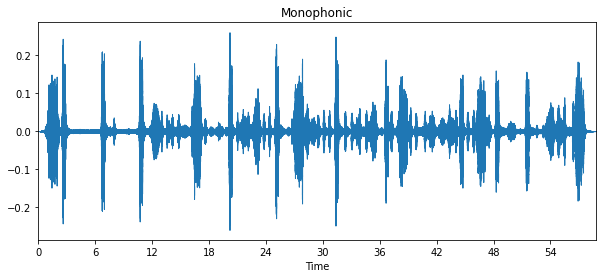

In [17]:
SOUND_DIR='downloads/Alder Flycatcher/audio_file.mp3'
# listen to the recording
ipd.display(ipd.Audio(SOUND_DIR,rate=48000))

# load the mp3 file
signal, sr = librosa.load(SOUND_DIR,duration=48000) # sr = sampling rate

# plot recording signal
plt.figure(figsize=(10, 4))
librosa.display.waveplot(signal, sr=sr)
plt.title('Monophonic')
plt.show()

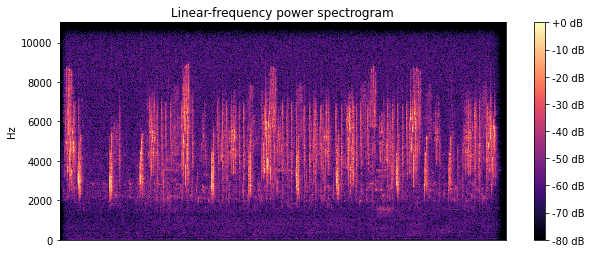

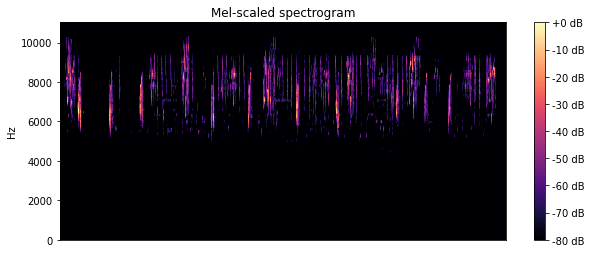

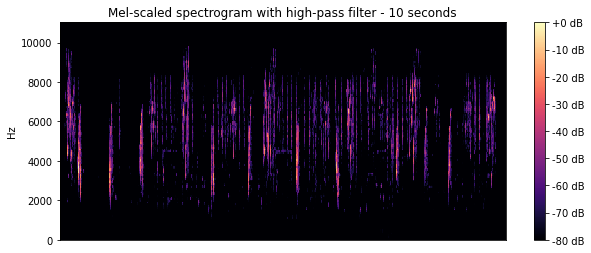

In [18]:
# Plot spectogram
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
plt.show()

# Plot mel-spectrogram
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 0 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.show()

# Plot mel-spectrogram with high-pass filter
N_FFT = 1024         
HOP_SIZE = 1024       
N_MELS = 128            
WIN_SIZE = 1024      
WINDOW_TYPE = 'hann' 
FEATURE = 'mel'      
FMIN = 1400 

S = librosa.feature.melspectrogram(y=signal,sr=sr,
                                    n_fft=N_FFT,
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, 
                                    fmax=sr/2) 

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max), fmin=FMIN,y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram with high-pass filter - 10 seconds')
plt.show()